# Flatmaps of final parcellation

In [18]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.parcel_hierarchy as ph
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.scripts.evaluate_atlas as eva
import ProbabilisticParcellation.similarity_colormap as cm
from Functional_Fusion.dataset import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt


# Plotting renamed Models to ensure they are correct

# Symmetric 68 map

In [4]:
info_Sym68, model_Sym68 = ut.load_batch_best(
    'Models_03/NettekovenSym68_space-MNISymC2')
info_Asym68, model_Asym68 = ut.load_batch_best(
    'Models_03/NettekovenAsym68_space-MNISymC2')

info_Sym32, model_Sym32 = ut.load_batch_best(
    'Models_03/NettekovenSym32_space-MNISymC2')
info_Asym32, model_Asym32 = ut.load_batch_best(
    'Models_03/NettekovenAsym32_space-MNISymC2')

# Settings
figsize = (8, 8)
_, cmap_68, labels_68 = nt.read_lut(ut.export_dir + 'NettekovenSym68.lut')
_, cmap_32, labels_32 = nt.read_lut(ut.export_dir + 'NettekovenSym32.lut')

suit_atlas, _ = am.get_atlas(info_Sym68.atlas, ut.base_dir + '/Atlases')


<Figure size 1400x500 with 0 Axes>

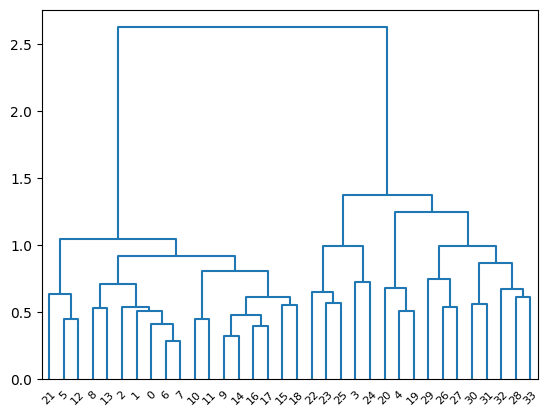

In [10]:
plt.figure(figsize=(14,5))
sym=True
w_cos_sym,_,_ = cl.parcel_similarity(model_Sym68,plot=False,sym=sym)
labels,clusters,leaves = cl.agglomative_clustering(w_cos_sym,sym=sym,method='ward',num_clusters=5)

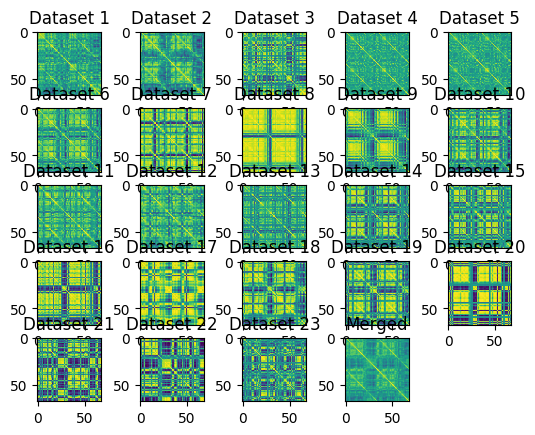

In [15]:
w_cos_sim, _, _ = cl.parcel_similarity(model_Sym68, plot=True, sym=False)


In [19]:
W = cm.calc_mds(w_cos_sim, center=True)
V = np.array([[-0.3, -0.6, 1], [1, -.6, -.7], [1, 1, 1]]).T
V = cm.make_orthonormal(V)
m = np.array([0.65, 0.65, 0.65])
l = np.array([1, 1, 1])
# cmap = ph.colormap_mds(w_cos_sim,target=None,clusters=clusters,gamma=0.3)
cmap = cm.colormap_mds(W, target=(m, l, V), clusters=clusters, gamma=0.1)


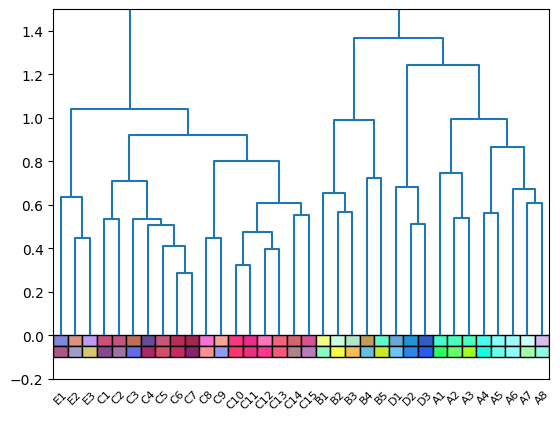

In [20]:
labels,clusters,leaves = cl.agglomative_clustering(w_cos_sym,sym=sym,cmap=cmap,method='ward',num_clusters=5)